In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2  
from skimage.transform import resize
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
cascade_path = cv2.CascadeClassifier('C://Users//Admin//anaconda3//Lib//site-packages//cv2//data//haarcascade_frontalface_default.xml')    

def load_and_align_images(filepath, margin=10):
    cascade = cascade_path


    aligned_images = []
    img = cv2.imread(filepath)

    faces = cascade.detectMultiScale(img,
                                      scaleFactor=1.1,
                                      minNeighbors=3)
    (x, y, w, h) = faces[0]
    cropped = img[y-margin//2:y+h+margin//2,
                  x-margin//2:x+w+margin//2, :]
    aligned = resize(cropped, (48, 48), mode='reflect')
    aligned_images.append(aligned)

    return np.array(aligned_images)

In [6]:
# l="C://Users//Admin//Downloads//nt.png"
# l="C://Users//Admin//Downloads//angry.jpg"
# l="C://Users//Admin//Downloads//sp.jpg"
# l="C://Users//Admin//Downloads//sad.jpg"
# l="C://Users//Admin//Downloads//happy.jpg"
# l="C://Users//Admin//Downloads//fear1.jpg"
# l="C://Users//Admin//Downloads//discust1.jpg"
l="C://Users//Admin//Downloads//lisa.jpg"
embs = load_and_align_images(l, margin=10)

# print(embs[0]*255)

# print(img)

(748, 660, 3)


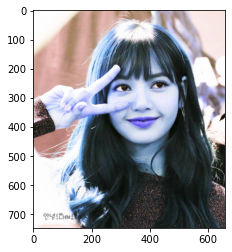

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(l)
print(img.shape)
# img = cv2.resize(img, (48, 48))
img.shape
plt.imshow(img)

(48, 48, 3)


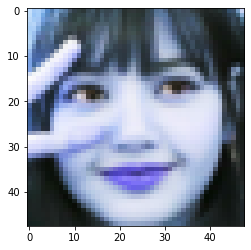

In [8]:
print(embs[0].shape)
plt.imshow(embs[0])

In [9]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

model=load_model('C://Users//Admin//Downloads//modeldone2class.h5')
# model=load_model('C://Users//Admin//Downloads//modeldone5class.h5')
# model=load_model('C://Users//Admin//Downloads//modeldone7class.h5')

arr_img = img_to_array(embs[0]*255)
# print(arr_img)
arr_img = tf.expand_dims(arr_img, 0) # Create a batch
y_pred = model.predict(arr_img)
score = tf.nn.softmax(y_pred[0])
class_names = ['happy', 'sad']
# class_names = ['angry', 'happy', 'neutral', 'sad', 'surprise']
# class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(np.array(score))
print(
    "Hình ảnh này rất có thể là ảnh '{}' với {:.2f} %."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

[0.9902823 0.0097177]
Hình ảnh này rất có thể là ảnh 'happy' với 99.03 %.


In [10]:
####################
# model=load_model('C://Users//Admin//Downloads//model5classtestunderfitting.h5')
model=load_model('C://Users//Admin//Downloads//model2classtestoverfitting.h5')

arr_img = img_to_array(embs[0])
arr_img = tf.expand_dims(arr_img, 0) # Create a batch
y_pred = model.predict(arr_img)

class_names = ['happy', 'sad']
# class_names = ['angry', 'happy', 'neutral', 'sad', 'surprise']

print(y_pred[0])
print(
    "Hình ảnh này rất có thể là ảnh '{}' với {:.2f} %."
    .format(class_names[np.argmax(y_pred)], 100 * np.max(y_pred))
)

[9.999987e-01 1.273770e-06]
Hình ảnh này rất có thể là ảnh 'happy' với 100.00 %.
